   ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  

Dataset Shape: (54214, 4)

Genres: GENRE
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



 Classification Report:
                precision    recall  f1-score   support

      action        0.53      0.27      0.35       263
       adult        0.71      0.21      0.33       112
   adventure        0.41      0.14      0.21       139
   animation        0.61      0.11      0.18       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.58      0.55      1443
       crime        0.43      0.03      0.05       107
 documentary        0.66      0.85      0.74      2659
       drama        0.54      0.78      0.64      2697
      family        0.41      0.07      0.12       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.94      0.42      0.59        40
     history        0.00      0.00      0.00        45
      horror        0.63      0.56      0.59       431
       music        0.62      0.47      0.54       144
     musical        1.00      0.02      0.04        50
     mystery        0.00      0.00    

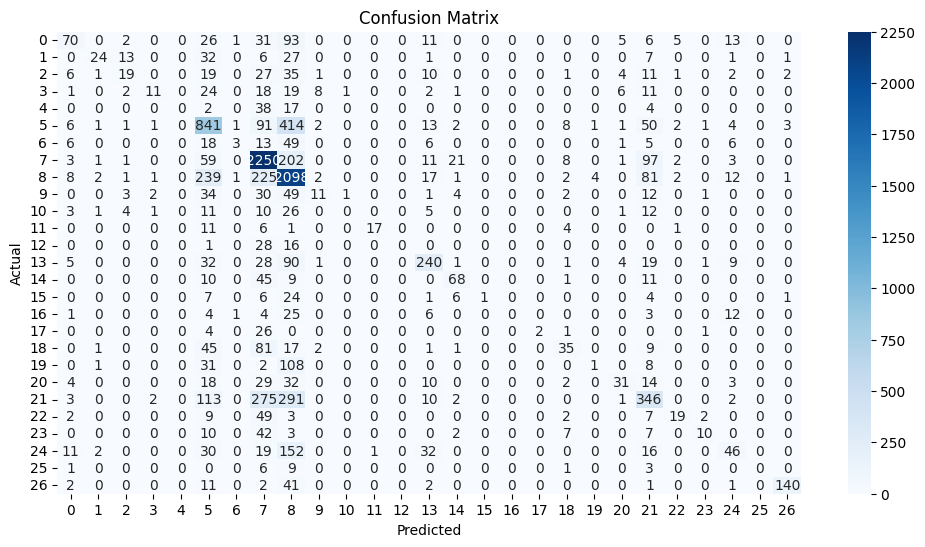


Custom Movie Genre Prediction:  fantasy 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("train_data.txt",sep=':::',engine='python',names=["ID","TITLE","GENRE","DESCRIPTION"])
print(df.head())
print("\nDataset Shape:",df.shape)
print("\nGenres:",df['GENRE'].value_counts())
X = df['DESCRIPTION']
y = df['GENRE']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
vectorizer=TfidfVectorizer(stop_words='english',max_features=5000)
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)
model=LogisticRegression(max_iter=200)
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)
print("\n Accuracy:",accuracy_score(y_test,y_pred))
print("\n Classification Report:\n",classification_report(y_test,y_pred))
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
custom_plot=["A young wizard attends a magical school and battles an evil sorcerer."]
custom_tfidf=vectorizer.transform(custom_plot)
prediction=model.predict(custom_tfidf)
print("\nCustom Movie Genre Prediction:",prediction[0])
